# Oil production

In [102]:
# DATA MANIPULATION, Visualization, and stats
import pandas as pd
from glob import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [103]:
# Your current working directory should be ./mattwagon/oil_production_prediction/notebooks
os.getcwd()

'/Users/eduardomonteiro/code/mattwagon/oil_production_prediction/notebooks'

## Import the data

In [104]:
# This filepath should work for all of us
# I have added 'raw_data' to .gitignore so it should never be pushed to the repo
path = os.path.join('..', 'raw_data')

In [105]:
file_names = os.listdir(path)
csv_files = [f for f in file_names if f.endswith('.csv')]

csv_files.sort()

df = pd.DataFrame()

for file in csv_files:
    file_path = os.path.join(path, file)
    df_aux = pd.read_csv(file_path)
    df = pd.concat([df, df_aux], ignore_index=True)

In [106]:
df.head()

,Date,Calculated Drawdown_At Gauge,Calculated Drawdown_At Bottom Node,Reservoir Pressure,z Well Identifier,z TMore PS Identifier,z TMore Identifier,z Tag Identifier 2,z Tag Identifier,z PI-AF Database,...,Annulus Master Valve Status,Annulus Master Valve Opening Frequency,Pseudo Cv,GL GOR,GL Qgas,GL Qliq,GL Qoil,GL Qwat,GL Ramp-up Speed,GL WCT
0,2007-02-01 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
1,2007-02-02 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
2,2007-02-03 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
3,2007-02-04 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
4,2007-02-05 00:00:00+01:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08


In [107]:
df.shape

(5813, 189)

In [108]:
df.dtypes.Date

dtype('O')

In [109]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype
df.Date[0]

Timestamp('2007-02-01 00:00:00+0100', tz='pytz.FixedOffset(60)')

In [110]:
# Removes the timezone aspect which makes the column easier to read but changes the date
df['Date'] = df['Date'].dt.tz_convert(None)
df['Date'].dtype
df.Date[0]

Timestamp('2007-01-31 23:00:00')

In [111]:
df.head()

,Date,Calculated Drawdown_At Gauge,Calculated Drawdown_At Bottom Node,Reservoir Pressure,z Well Identifier,z TMore PS Identifier,z TMore Identifier,z Tag Identifier 2,z Tag Identifier,z PI-AF Database,...,Annulus Master Valve Status,Annulus Master Valve Opening Frequency,Pseudo Cv,GL GOR,GL Qgas,GL Qliq,GL Qoil,GL Qwat,GL Ramp-up Speed,GL WCT
0,2007-01-31 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
1,2007-02-01 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
2,2007-02-02 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
3,2007-02-03 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08
4,2007-02-04 23:00:00,NaN,NaN,186.34,30221,NaN,NaN,1,3022,NaN,...,NaN,NaN,NaN,52.5,90.0,32300.0,10960.0,21360.0,NaN,66.08


## Remove features with >30% NaN values

In [112]:
sorted_nan = df.isnull().sum().sort_values(ascending=False)
sorted_nan

Annulus Master Valve Status     5813
Qliq IPR                        5813
Qliq VLP/IPR                    5813
Qoil IPR                        5813
IWC Status                      5813
                                ... 
MPFM CF Liq                        0
MPFM CF GOR                        0
Downhole Gauge Status              0
Downhole Gauge Depth TVD MSL       0
GL WCT                             0
Length: 189, dtype: int64

In [113]:
features_drop = []
for feature, value in dict(sorted_nan).items():
    if value == len(df):
        features_drop.append(feature)

In [114]:
dic = {}
for feature, value in dict(sorted_nan).items():
    if value < len(df) and value > 0:
        dic[feature] = value

In [115]:
dic_2 = {}

for feature, value in dic.items():
    dic_2[feature] = round(value/len(df),2) 
    if dic_2[feature] > 0.3:
        features_drop.append(feature)

In [116]:
df.drop(columns=features_drop, inplace=True)

In [117]:
df.shape

(5813, 65)

In [118]:
df.head(5)

,Date,Reservoir Pressure,z Well Identifier,z Tag Identifier 2,z Tag Identifier,WHT,WHP,Well Head Elevation,Water Density,Tubing Gradient,...,Choke Calculated,Bottomhole Reference Depth TVD MSL,Bottomhole Reference Depth MD MSL,Annulus P,GL GOR,GL Qgas,GL Qliq,GL Qoil,GL Qwat,GL WCT
0,2007-01-31 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08
1,2007-02-01 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08
2,2007-02-02 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08
3,2007-02-03 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08
4,2007-02-04 23:00:00,186.34,30221,1,3022,NaN,NaN,1264.6,1.041,0.0,...,NaN,2165.7,2454.8,NaN,52.5,90.0,32300.0,10960.0,21360.0,66.08


## Select features to impute

Let's take a look at features with less than 30% NaN

In [119]:
features_to_impute_check = []

for feature, value in dic_2.items():
    if value < 0.3:
        features_to_impute_check.append(feature)

In [120]:
remove = {"Sand Rate", "MPFM NTotal Count Rate", "MPFM N81 Count Rate", "MPFM N356 Count Rate", "MPFM N32 Count Rate", "MPFM GOR", "Downhole Gauge T", "Downhole Gauge P"}
 
features_to_impute = [f for f in features_to_impute_check if f not in remove]

In [121]:
len(features_to_impute)

25

In [122]:
df.drop(columns=remove, inplace=True)

In [123]:
df_to_impute = df[df.columns.intersection(features_to_impute)]

In [124]:
df_to_impute.head(5)

,WHT,WHP,Service Line P,Sand Raw,Qwat MPFM corrected,Qwat MPFM,Qoil MPFM corrected,Qoil MPFM,Qliq MPFM corrected,Qliq MPFM,...,Manifold T,Manifold P,Jumper T,Choke Opening Calc2,Choke Opening Calc1,Choke Opening,Choke Measured,Choke CCR,Choke Calculated,Annulus P
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df_to_impute.describe()

,WHT,WHP,Service Line P,Sand Raw,Qwat MPFM corrected,Qwat MPFM,Qoil MPFM corrected,Qoil MPFM,Qliq MPFM corrected,Qliq MPFM,...,Manifold T,Manifold P,Jumper T,Choke Opening Calc2,Choke Opening Calc1,Choke Opening,Choke Measured,Choke CCR,Choke Calculated,Annulus P
count,5642.000000,5228.000000,5521.000000,5747.000000,5664.000000,5642.000000,5664.000000,5633.000000,5664.000000,5628.000000,...,5128.000000,5782.000000,4835.000000,5785.000000,5780.000000,5753.000000,5753.000000,5785.000000,5780.000000,5751.000000
mean,48.831748,82.685001,124.365437,5434.123375,10354.114095,10422.348374,15589.131906,15706.773138,25943.246002,26133.836456,...,48.723259,67.082424,47.728970,75.994536,75.990730,76.907927,76.907927,75.994536,75.990730,139.652154
std,8.227372,19.358646,32.454476,879.564456,6611.698415,6573.008235,9030.323334,8955.454985,8292.619083,8013.385746,...,9.986042,13.047429,8.744576,20.610524,20.513595,19.849258,19.849258,20.610524,20.513595,24.360330
min,2.044475,1.013250,58.107376,2744.435303,-11.831733,-11.831733,0.000000,0.000000,0.000000,0.000000,...,-1.088101,1.000000,-8.794330,0.000000,0.000000,-0.251513,-0.251513,0.000000,0.000000,18.328125
25%,49.698901,72.185286,105.313896,4847.917725,3291.518388,3417.593842,9691.354946,9731.330410,22872.243590,22998.066174,...,49.200542,64.776993,48.669762,69.500000,69.902908,71.024460,71.024460,69.500000,69.902908,114.920982
50%,51.247467,78.146263,109.413887,5084.182129,12935.184728,12960.072938,13932.108410,14065.431937,26524.630513,26572.039040,...,51.940947,69.046879,51.085567,76.000000,76.213593,76.917267,76.917267,76.000000,76.213593,150.246353
75%,51.716765,83.912359,129.247482,5785.894531,15590.195567,15601.058678,18567.139606,18599.235723,31155.054050,31173.918848,...,53.746908,72.578142,51.790573,88.000000,87.864075,89.496338,89.496338,88.000000,87.864075,157.888649
max,52.393002,216.446396,272.471619,12071.355469,25903.980632,25903.980632,49223.595339,49223.595339,49676.388581,49676.388581,...,54.276535,140.115250,52.241966,100.300003,100.000000,101.011047,101.011047,100.300003,100.000000,168.035065


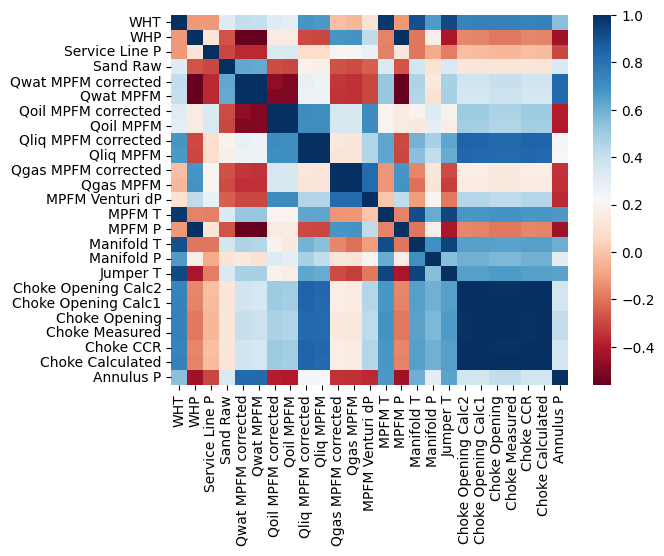

In [126]:
# Pairwise correlation
sns.heatmap(df_to_impute.corr(), cmap='RdBu')
plt.show()

A lot of the 'Choke' features seem to be duplicates of each other or at least extremely similar

Qwat and Annulus P features show strong negative correlation towards our target feature

Let's look into the choke features

In [127]:
# Get list of choke features
choke_cols = [col for col in df_to_impute.columns if 'Choke' in col]
choke_cols

['Choke Opening Calc2',
 'Choke Opening Calc1',
 'Choke Opening',
 'Choke Measured',
 'Choke CCR',
 'Choke Calculated']

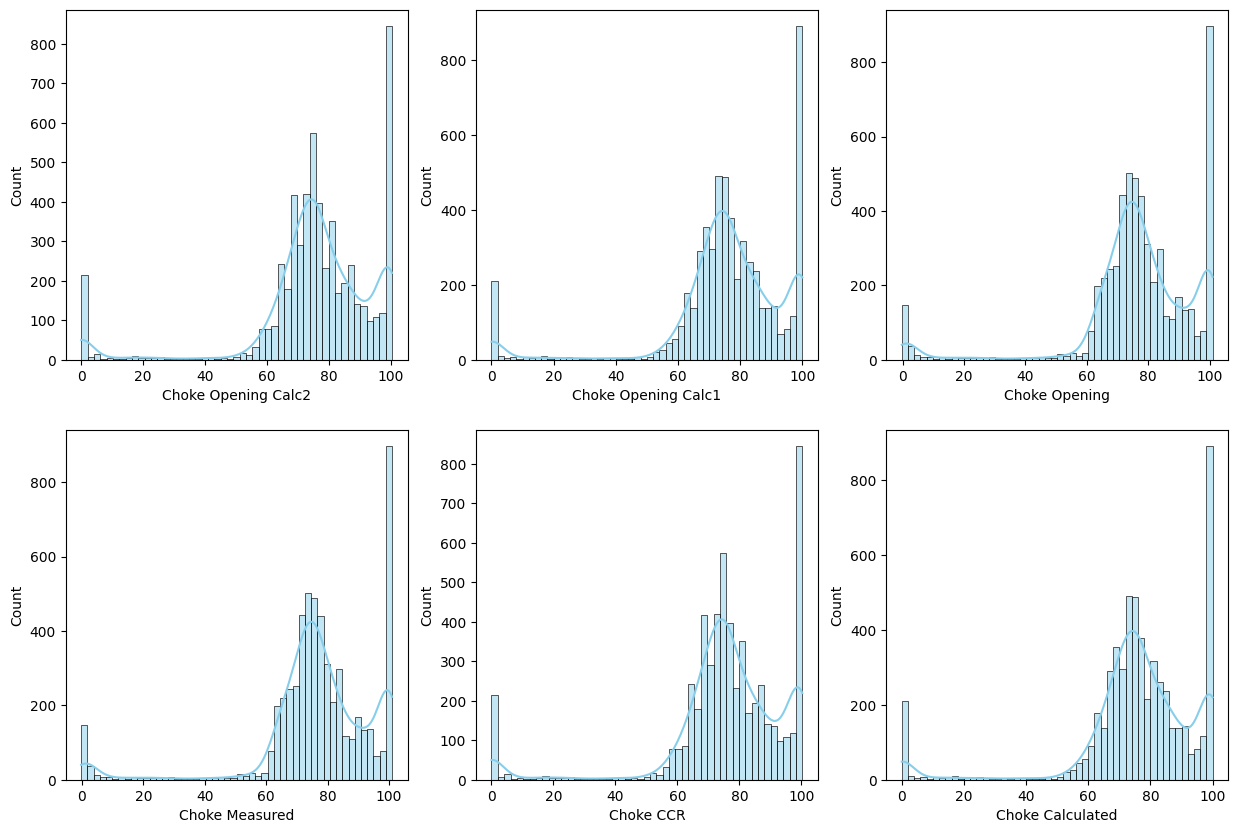

In [128]:
# Visual look at distribution of choke data to check for any notable differences
f, axes = plt.subplots(2, 3, figsize=(15, 10))
for ax, feature in zip(axes.flat, df_to_impute[choke_cols]):
    sns.histplot(df_to_impute[feature] , color="skyblue", kde=True, ax=ax)

The features look like pairs (Choke Opening calc 1 - Choke Calculated), (Choke Opening - Choke Measured) and (Choke CCR - Choke Opening Calc 2)

We should drop one of each pair to avoid multicollinearity

In [129]:
choke_features_drop = ['Choke Opening Calc1', 'Choke Opening Calc2', 'Choke Measured', 'Choke Calculated', 'Choke CCR']

In [130]:
df.drop(columns=choke_features_drop, inplace = True)

In [131]:
df_to_impute.drop(columns=choke_features_drop, inplace = True)

/var/folders/25/mbstknkd5kn2fd3pcw0r9n4w0000gn/T/ipykernel_1363/2961375177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_impute.drop(columns=choke_features_drop, inplace = True)


In [132]:
corrected_features_drop = ['Qwat MPFM corrected', 'Qoil MPFM corrected', 'Qliq MPFM corrected', 'Qgas MPFM corrected']

In [133]:
df.drop(columns=corrected_features_drop, inplace=True)

In [134]:
df_to_impute.drop(columns=corrected_features_drop, inplace=True)

/var/folders/25/mbstknkd5kn2fd3pcw0r9n4w0000gn/T/ipykernel_1363/853530730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_impute.drop(columns=corrected_features_drop, inplace=True)


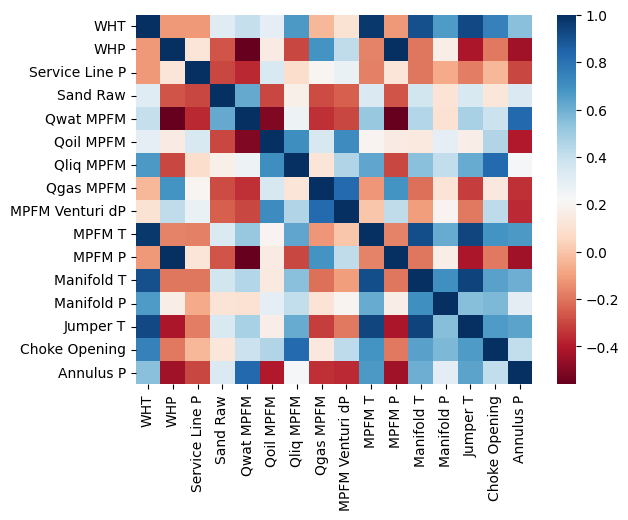

In [135]:
# Pairwise correlation
sns.heatmap(df_to_impute.corr(), cmap='RdBu')
plt.show()

In [136]:
#converting the correlation matrix into a DataFrame
corr_df = df_to_impute.corr().stack().reset_index()

#renaming the columns
corr_df.columns = ['feature_1', 'feature_2', 'correlation']

#remove 'self correlations'
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [137]:
#compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

#showing the top 5 most correlated pairs of feature
corr_df.sort_values(by='absolute_correlation', ascending = False).head(13)

,feature_1,feature_2,correlation,absolute_correlation
161,MPFM P,WHP,1.000000,1.000000
26,WHP,MPFM P,1.000000,1.000000
144,MPFM T,WHT,0.970648,0.970648
9,WHT,MPFM T,0.970648,0.970648
189,Manifold T,Jumper T,0.945012,0.945012
219,Jumper T,Manifold T,0.945012,0.945012
157,MPFM T,Jumper T,0.935318,0.935318
217,Jumper T,MPFM T,0.935318,0.935318
208,Jumper T,WHT,0.923617,0.923617
13,WHT,Jumper T,0.923617,0.923617


In [138]:
df_to_impute['WHP']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5808    65.511459
5809    65.433243
5810    65.115013
5811    64.796227
5812    64.555321
Name: WHP, Length: 5813, dtype: float64

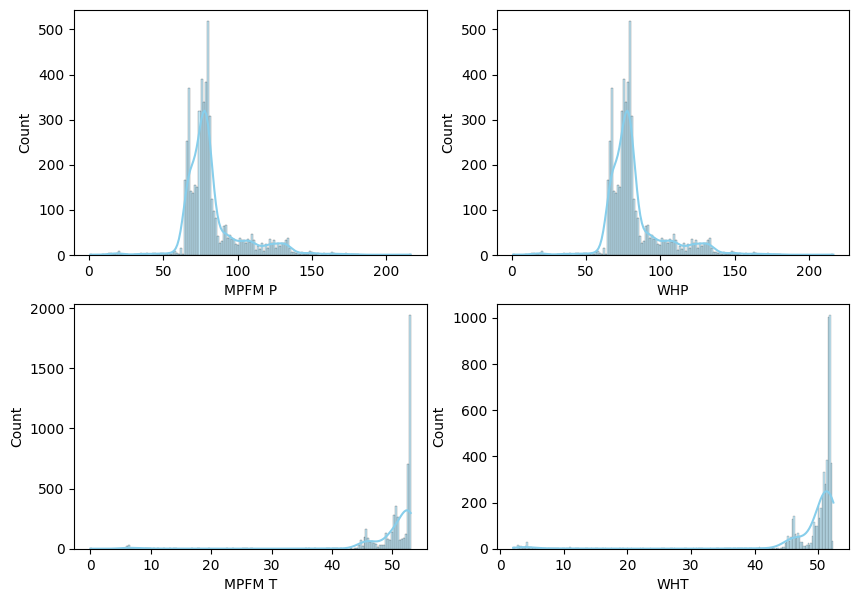

In [139]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))
for ax, feature in zip(axes.flat, df_to_impute[['MPFM P', 'WHP', 'MPFM T', 'WHT']]):
    sns.histplot(df_to_impute[feature] , color="skyblue", kde=True, ax=ax)

MPFM P and WHP are the same ->
drop one of them

In [140]:
df.drop(columns=['WHP'], inplace=True)

In [141]:
df_to_impute.drop(columns='WHP', inplace=True)

/var/folders/25/mbstknkd5kn2fd3pcw0r9n4w0000gn/T/ipykernel_1363/4221279479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_impute.drop(columns='WHP', inplace=True)


## Impute remaining features

In [142]:
df_to_impute.columns

Index(['WHT', 'Service Line P', 'Sand Raw', 'Qwat MPFM', 'Qoil MPFM',
       'Qliq MPFM', 'Qgas MPFM', 'MPFM Venturi dP', 'MPFM T', 'MPFM P',
       'Manifold T', 'Manifold P', 'Jumper T', 'Choke Opening', 'Annulus P'],
      dtype='object')

In [143]:
for feature in df_to_impute.columns:
    df[feature].replace(np.nan, df[feature].mean(), inplace=True)
    

In [144]:
df.isnull().sum()

Date                                  0
Reservoir Pressure                    0
z Well Identifier                     0
z Tag Identifier 2                    0
z Tag Identifier                      0
WHT                                   0
Well Head Elevation                   0
Water Density                         0
Tubing Gradient                       0
Tubing dP                             0
Service Line P                        0
Sand Raw                              0
Qwat PC                               0
Qwat MPFM                             0
Qoil Target                           0
Qoil PC                               0
Qoil MPFM                             0
Qoil Choke Method                     0
Qliq MPFM                             0
Qliq Choke Method                     0
Qgas PC                               0
Qgas MPFM                             0
MPFM WCT                              0
MPFM Venturi dP                       0
MPFM T                                0


In [145]:
df.shape

(5813, 47)

## Remove features with null std

In [146]:
df.describe()

,Reservoir Pressure,z Well Identifier,z Tag Identifier 2,z Tag Identifier,WHT,Well Head Elevation,Water Density,Tubing Gradient,Tubing dP,Service Line P,...,Choke Opening,Bottomhole Reference Depth TVD MSL,Bottomhole Reference Depth MD MSL,Annulus P,GL GOR,GL Qgas,GL Qliq,GL Qoil,GL Qwat,GL WCT
count,5.813000e+03,5813.0,5813.0,5813.0,5813.000000,5.813000e+03,5.813000e+03,5813.000000,5813.000000,5813.000000,...,5813.000000,5.813000e+03,5.813000e+03,5813.000000,5813.0,5813.0,5813.0,5813.0,5813.0,5.813000e+03
mean,1.863400e+02,30221.0,1.0,3022.0,48.831748,1.264600e+03,1.041000e+00,0.681469,56.690035,124.365437,...,76.907927,2.165700e+03,2.454800e+03,139.652154,52.5,90.0,32300.0,10960.0,21360.0,6.608000e+01
std,2.842415e-14,0.0,0.0,0.0,8.105436,2.273932e-13,2.220637e-16,0.431681,35.910690,31.628700,...,19.746536,4.547865e-13,4.547865e-13,24.230049,0.0,0.0,0.0,0.0,0.0,1.421208e-14
min,1.863400e+02,30221.0,1.0,3022.0,2.044475,1.264600e+03,1.041000e+00,-1.163743,-96.809479,58.107376,...,-0.251513,2.165700e+03,2.454800e+03,18.328125,52.5,90.0,32300.0,10960.0,21360.0,6.608000e+01
25%,1.863400e+02,30221.0,1.0,3022.0,49.433064,1.264600e+03,1.041000e+00,0.581442,48.369011,105.427673,...,71.080894,2.165700e+03,2.454800e+03,114.992844,52.5,90.0,32300.0,10960.0,21360.0,6.608000e+01
50%,1.863400e+02,30221.0,1.0,3022.0,51.177841,1.264600e+03,1.041000e+00,0.813119,67.641785,110.661186,...,76.907927,2.165700e+03,2.454800e+03,150.131546,52.5,90.0,32300.0,10960.0,21360.0,6.608000e+01
75%,1.863400e+02,30221.0,1.0,3022.0,51.697182,1.264600e+03,1.041000e+00,0.971290,80.799698,129.220810,...,89.220985,2.165700e+03,2.454800e+03,157.666885,52.5,90.0,32300.0,10960.0,21360.0,6.608000e+01
max,1.863400e+02,30221.0,1.0,3022.0,52.393002,1.264600e+03,1.041000e+00,2.267137,188.598680,272.471619,...,101.011047,2.165700e+03,2.454800e+03,168.035065,52.5,90.0,32300.0,10960.0,21360.0,6.608000e+01


##### Drop features with std = 0

In [148]:
features_null_std = []

for feature in df.drop(columns='Date').columns:
    if df[feature].std() < 0.0000001:
        features_null_std.append(feature)
        
features_null_std

['Reservoir Pressure',
 'z Well Identifier',
 'z Tag Identifier 2',
 'z Tag Identifier',
 'Well Head Elevation',
 'Water Density',
 'Qoil Target',
 'Qoil Choke Method',
 'Qliq Choke Method',
 'MPFM Status',
 'MPFM CF WCT',
 'MPFM CF Liq',
 'Downhole Gauge Status',
 'Downhole Gauge Depth TVD MSL',
 'Downhole Gauge Depth MD MSL',
 'Control Target',
 'Bottomhole Reference Depth TVD MSL',
 'Bottomhole Reference Depth MD MSL',
 'GL GOR',
 'GL Qgas',
 'GL Qliq',
 'GL Qoil',
 'GL Qwat',
 'GL WCT']

In [149]:
df.drop(columns=features_null_std, inplace=True)

In [150]:
df.shape

(5813, 23)

## Feature selection

In [151]:
#converting the correlation matrix into a DataFrame
corr_df = df.corr().stack().reset_index()

#renaming the columns
corr_df.columns = ['feature_1', 'feature_2', 'correlation']

#remove 'self correlations'
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

/var/folders/25/mbstknkd5kn2fd3pcw0r9n4w0000gn/T/ipykernel_1363/2819890218.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr().stack().reset_index()


In [152]:
#compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

#showing the top 5 most correlated pairs of feature
corr_df.sort_values(by='absolute_correlation', ascending = False).head(20)

,feature_1,feature_2,correlation,absolute_correlation
24,Tubing Gradient,Tubing dP,1.000000,1.000000
45,Tubing dP,Tubing Gradient,1.000000,1.000000
117,Qwat PC,Qoil PC,0.999963,0.999963
159,Qoil PC,Qwat PC,0.999963,0.999963
164,Qoil PC,Qgas PC,0.999912,0.999912
227,Qgas PC,Qoil PC,0.999912,0.999912
225,Qgas PC,Qwat PC,0.999798,0.999798
120,Qwat PC,Qgas PC,0.999798,0.999798
236,Qgas PC,MPFM CF GOR,0.995304,0.995304
362,MPFM CF GOR,Qgas PC,0.995304,0.995304


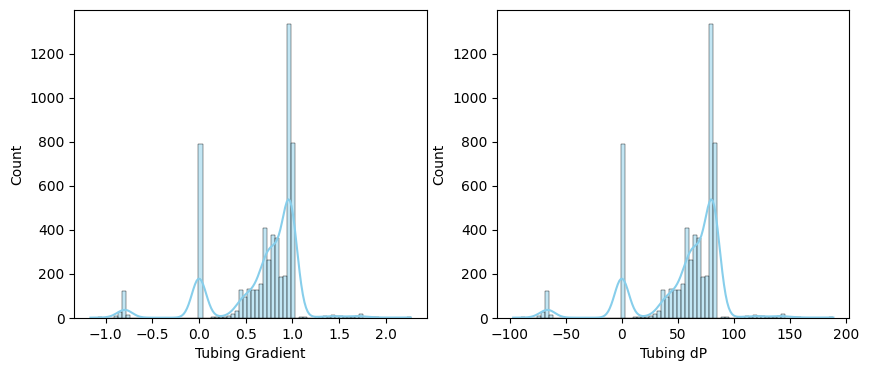

In [153]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, feature in zip(axes.flat, df[['Tubing Gradient', 'Tubing dP']]):
    sns.histplot(df[feature] , color="skyblue", kde=True, ax=ax)

In [154]:
df[['Tubing Gradient', 'Tubing dP']].describe()

,Tubing Gradient,Tubing dP
count,5813.000000,5813.000000
mean,0.681469,56.690035
std,0.431681,35.910690
min,-1.163743,-96.809479
25%,0.581442,48.369011
50%,0.813119,67.641785
75%,0.971290,80.799698
max,2.267137,188.598680


In [155]:
(df['Tubing dP']/df['Tubing Gradient']).value_counts()

83.188037    3438
83.188037    1231
83.188037     311
83.188037      33
83.188037       6
83.188037       1
83.188037       1
83.188037       1
dtype: int64

In [156]:
df.drop(columns=['Qwat PC', 'Qgas PC', 'Qoil PC', 'Tubing dP'], inplace = True)

In [157]:
df.shape

(5813, 19)

## 2013 to 2015 Scaling

### Splitting the data

Text(0.5, 1.0, 'Qoil MPFM')

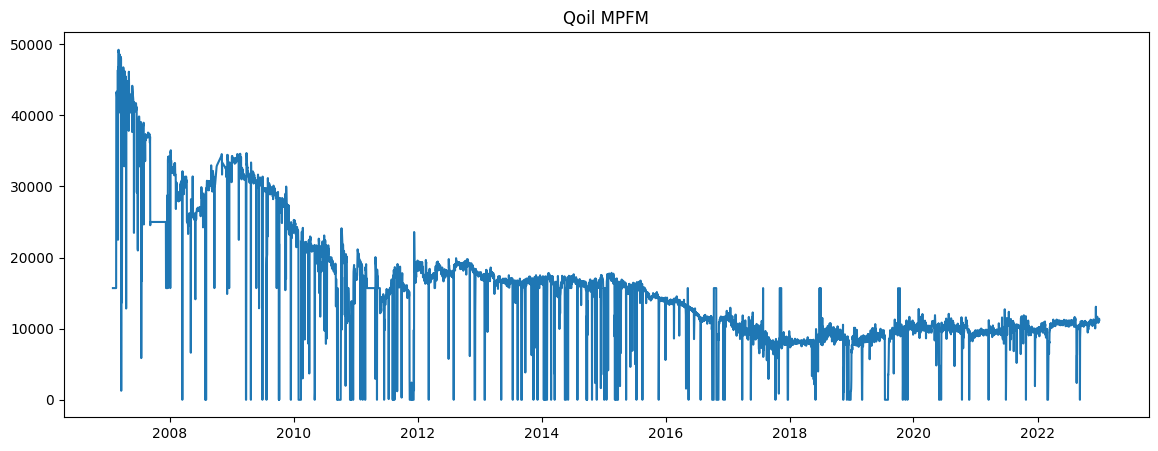

In [56]:
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Qoil MPFM'])
plt.title('Qoil MPFM')

In [186]:
start_date = pd.to_datetime('2012-12-31 23:00:00')
end_date = pd.to_datetime('2014-12-31 23:00:00')

df_split_filtered = df[(df['Date']>=start_date) & (df['Date']<=end_date)]
df_split_filtered.head()

,Date,WHT,Tubing Gradient,Service Line P,Sand Raw,Qwat MPFM,Qoil MPFM,Qliq MPFM,Qgas MPFM,MPFM WCT,MPFM Venturi dP,MPFM T,MPFM P,MPFM CF GOR,Manifold T,Manifold P,Jumper T,Choke Opening,Annulus P
2161,2012-12-31 23:00:00,50.162731,0.744933,106.131401,5187.973633,14158.795547,17715.576430,31874.371977,763.794375,44.420626,4721.460938,50.328392,79.298576,1.0,50.292953,72.119667,48.698689,99.751900,148.744186
2162,2013-01-01 23:00:00,50.134289,0.735164,105.109146,5189.467285,14172.375227,17825.721443,31998.096671,769.070484,44.291307,4698.521484,50.328369,79.965904,1.0,50.278080,71.964745,48.669731,99.580963,148.754395
2163,2013-01-02 23:00:00,50.131981,0.738884,105.319756,5197.213379,13991.734734,17744.036058,31735.770791,760.731234,44.088215,4598.681152,50.321018,79.575325,1.0,50.279709,71.891701,48.670185,99.780243,148.673172
2164,2013-01-03 23:00:00,50.132175,0.736528,150.600601,5244.536621,14449.302343,17751.328614,32200.630958,743.999391,44.872730,4618.371582,50.325607,79.661232,1.0,50.290806,71.683594,48.669735,99.745178,148.778641
2165,2013-01-04 23:00:00,50.128189,0.731995,105.171509,5215.544434,14003.006409,17838.187431,31841.193840,749.324625,43.977643,4583.948730,50.322517,80.017265,1.0,50.277149,71.741768,48.669788,99.714218,148.707993


In [187]:
df_split_filtered.describe()

,WHT,Tubing Gradient,Service Line P,Sand Raw,Qwat MPFM,Qoil MPFM,Qliq MPFM,Qgas MPFM,MPFM WCT,MPFM Venturi dP,MPFM T,MPFM P,MPFM CF GOR,Manifold T,Manifold P,Jumper T,Choke Opening,Annulus P
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000
mean,47.958586,0.720668,132.212810,5184.741835,13322.180641,15463.435799,28808.638951,539.008658,42.046336,3409.453284,48.840686,79.126081,1.0,44.285646,67.370419,47.587234,89.339187,150.414771
std,9.171162,0.238106,30.221483,340.353056,3902.510690,4111.798204,7675.605049,199.702269,14.203570,1097.721583,8.084542,10.583293,0.0,11.717918,16.135764,3.372630,24.600797,16.966418
min,3.374570,-0.543679,68.384743,4160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.971007,6.309576,33.215260,1.0,1.000000,1.000000,0.000000,-0.021520,37.175625
25%,49.697845,0.702740,111.997051,5124.746094,12775.591529,16147.480422,29415.732397,411.448547,43.114042,3219.914429,50.216957,74.540092,1.0,48.723259,68.871460,47.728970,87.539944,150.266953
50%,50.085976,0.724525,124.365437,5232.292480,14165.442001,16604.086939,30855.227996,582.178875,46.174898,3770.556641,50.574356,79.492462,1.0,48.723259,71.408623,47.728970,99.841957,153.099152
75%,50.591534,0.777270,135.321907,5304.286377,15664.298456,16975.555278,32159.978295,684.738984,48.716283,4042.393921,51.364197,80.766747,1.0,48.723259,72.832226,47.728970,100.135712,158.923431
max,51.867867,1.752765,272.471619,10764.262695,18759.462356,18599.998147,34722.789027,879.977344,69.729575,5008.322754,52.708523,216.446396,1.0,51.268543,124.781136,50.602657,100.739510,162.530960


Text(0.5, 1.0, 'Qoil MPFM')

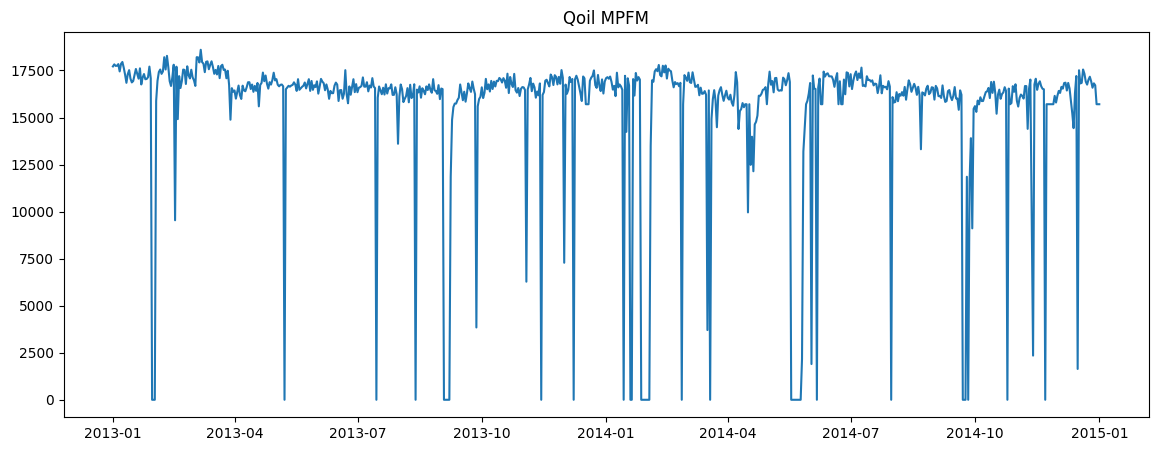

In [188]:
plt.figure(figsize=(14,5))
plt.plot(df_filtered['Date'], df_filtered['Qoil MPFM'])
plt.title('Qoil MPFM')

### Feature selection in data from 2013-2015

In [190]:
new_std0_features = []

for feature in df_split_filtered.drop(columns='Date').columns:
    if df_split_filtered[feature].std() < 0.000001:
        new_std0_features.append(feature)

new_std0_features

['MPFM CF GOR']

In [191]:
df_split_filtered.drop(columns = new_std0_features, inplace=True)

/var/folders/25/mbstknkd5kn2fd3pcw0r9n4w0000gn/T/ipykernel_1363/971075807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split_filtered.drop(columns = new_std0_features, inplace=True)


### Scaling data from 2013 to 2015

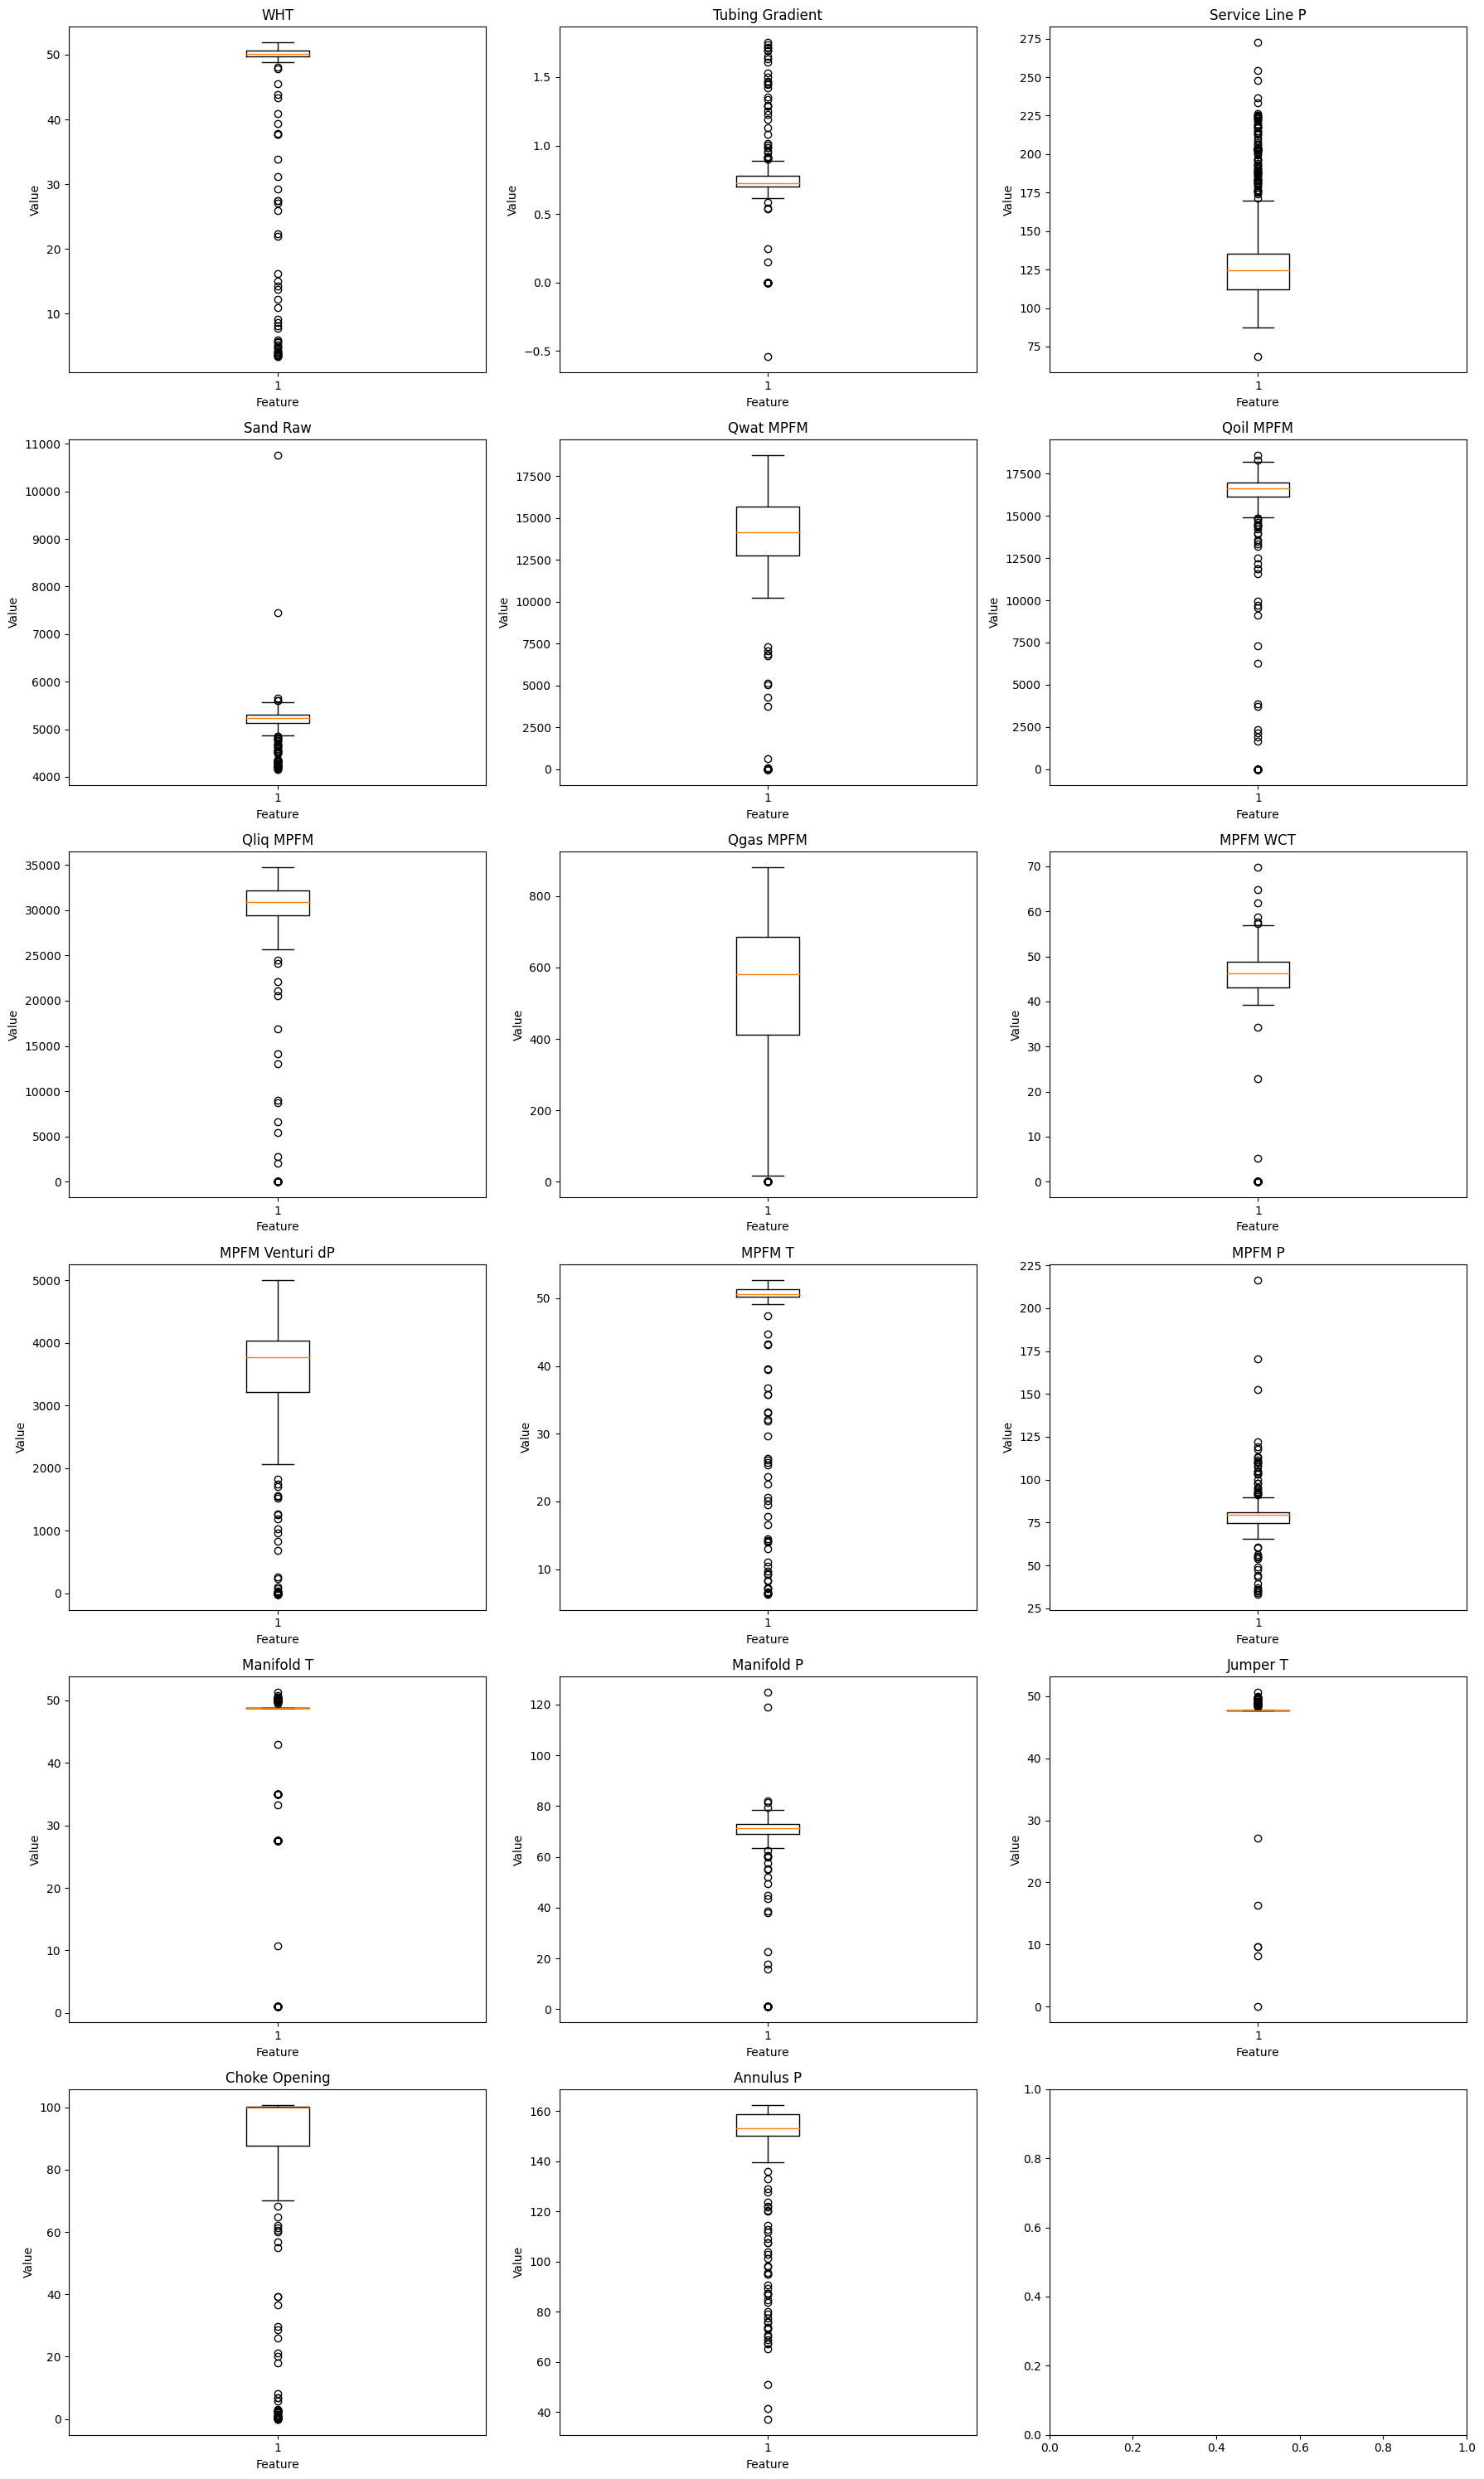

In [195]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))

for i, col in enumerate(df_split_filtered.drop(columns='Date').columns):
    ax = axes[i // 3, i % 3]
    ax.boxplot(df_split_filtered[col])
    ax.set_title(col)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Value')


plt.tight_layout()
plt.show()

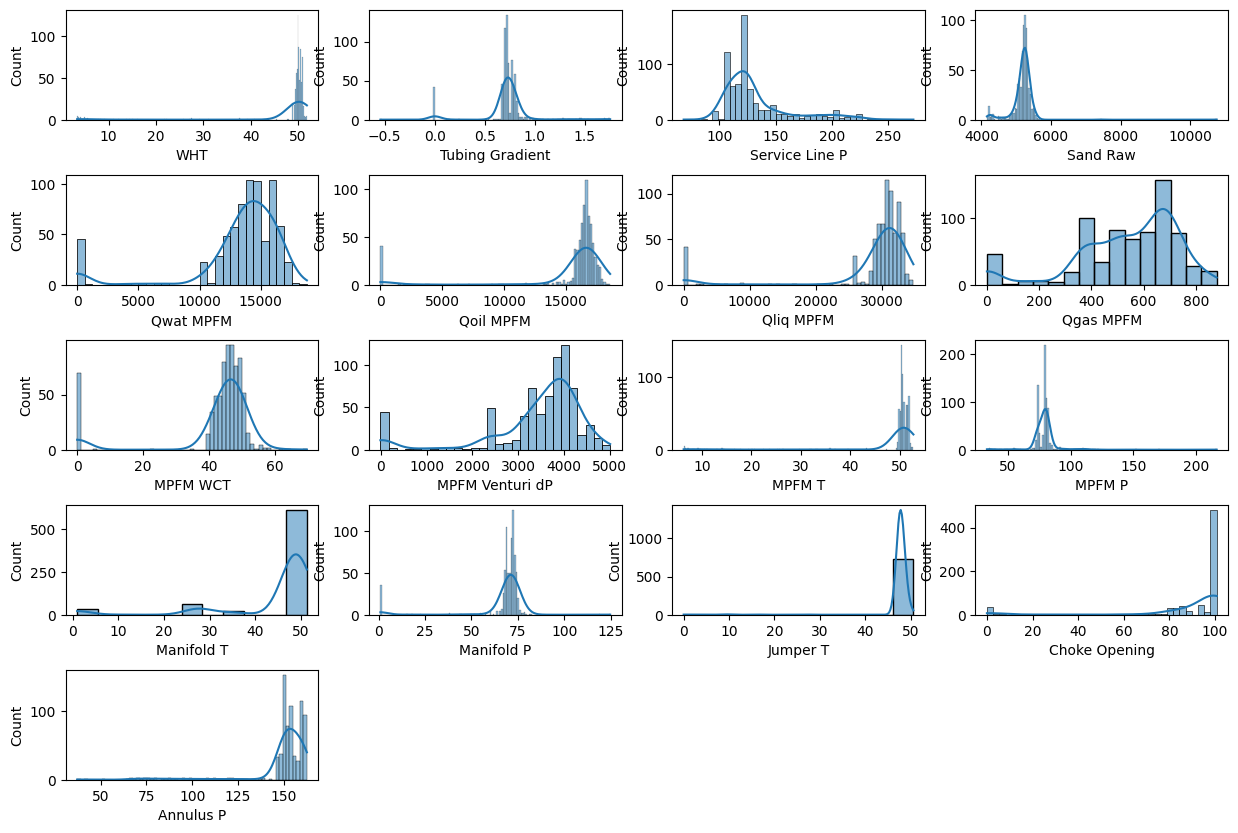

In [201]:
# Create a figure and axis for each histogram
fig, axs = plt.subplots(5, 4, figsize=(15, 10))

axs = axs.ravel()

for i, col in enumerate(df_split_filtered.drop(columns='Date').columns):
    sns.histplot(df_split_filtered[col], kde=True, ax=axs[i])

for j in range(len(df_split_filtered.drop(columns='Date').columns), len(axs)):
    axs[j].axis('off')

plt.subplots_adjust(hspace=0.5)

plt.show()

Features with many outliers and heavily skewed -> outliers might be full part of the dataset and shouldn't be removed -> MinMaxScaling

In [202]:
X_split = df_split_filtered.drop(columns=['Date','Qoil MPFM'])
y_split = df_split_filtered['Qoil MPFM']

In [204]:
#Instantiate MinMaxScaler
min_max_scaler = MinMaxScaler()

#fit
min_max_scaler.fit(X_split)

#transform
X_split_scaled = min_max_scaler.transform(X_split)

X_split_scaled

array([[0.96483771, 0.56113362, 0.18495387, ..., 0.96237413, 0.99019849,
        0.89001845],
       [0.96425119, 0.55687987, 0.17994495, ..., 0.96180188, 0.98850204,
        0.89009989],
       [0.9642036 , 0.55849963, 0.18097691, ..., 0.96181085, 0.99047979,
        0.88945195],
       ...,
       [0.74224178, 0.23674825, 1.        , ..., 0.94321074, 0.02498495,
        0.98136292],
       [0.93739097, 0.23674825, 0.2576924 , ..., 0.94321074, 0.02091113,
        0.51170581],
       [0.93739097, 0.23674825, 0.26416117, ..., 0.94321074, 0.02267876,
        0.41561776]])

## Full Dataset Scaling

### Scaling the data

In [160]:
df_to_scale = df.drop(columns=['Date', 'Qoil MPFM'])

In [161]:
df_to_scale.shape

(5813, 17)

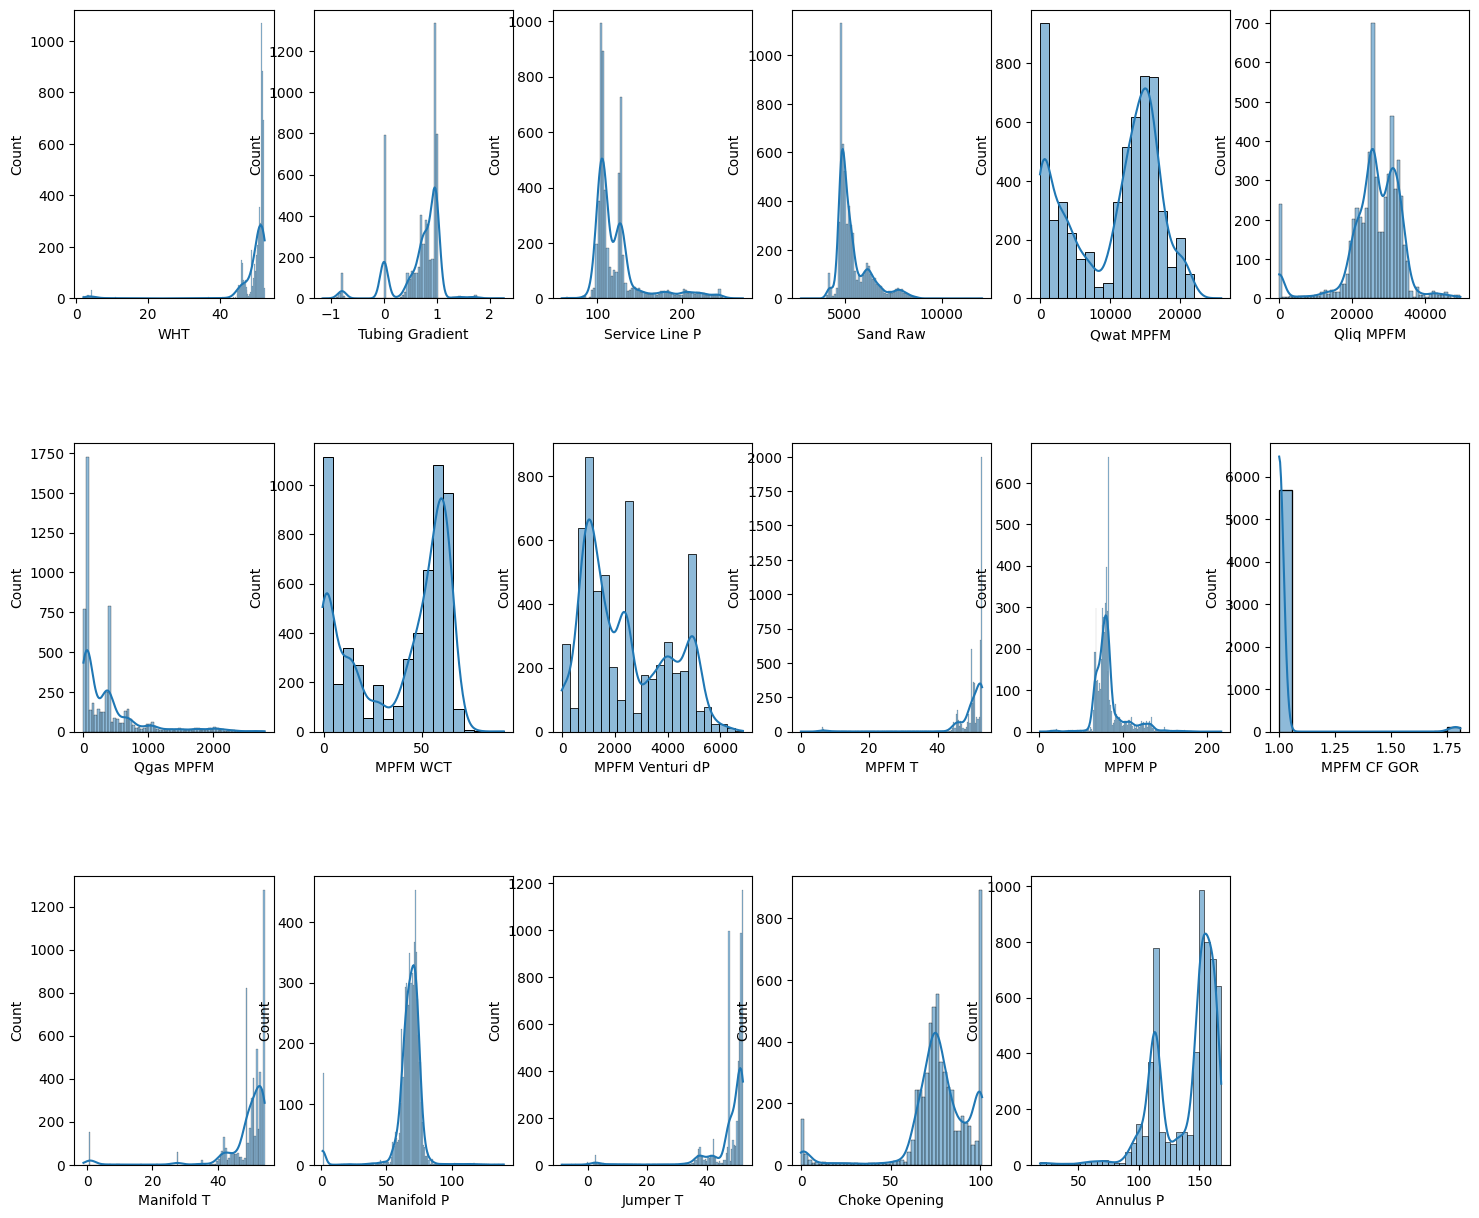

In [163]:
# Create a figure and axis for each histogram
fig, axs = plt.subplots(3, 6, figsize=(18, 15))

axs = axs.ravel()

for i, col in enumerate(df_to_scale.columns):
    sns.histplot(df_to_scale[col], kde=True, ax=axs[i])

for j in range(len(df_to_scale.columns), len(axs)):
    axs[j].axis('off')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [168]:
#Instantiate MinMaxScaler
min_max_scaler = MinMaxScaler()

#fit
min_max_scaler.fit(df_to_scale)

#transform
df_scaled = min_max_scaler.transform(df_to_scale)

df_scaled = pd.DataFrame(df_scaled, columns=df_to_scale.columns)
df_scaled

,WHT,Tubing Gradient,Service Line P,Sand Raw,Qwat MPFM,Qliq MPFM,Qgas MPFM,MPFM WCT,MPFM Venturi dP,MPFM T,MPFM P,MPFM CF GOR,Manifold T,Manifold P,Jumper T,Choke Opening,Annulus P
0,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
1,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
2,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
3,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
4,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,0.991534,0.631761,0.169222,0.645635,0.835718,0.655687,0.019897,0.726836,0.248021,0.998688,0.299389,0.926013,0.996707,0.397482,0.996893,0.723336,0.859707
5809,0.991559,0.631805,0.170497,0.591744,0.812666,0.648027,0.019430,0.715237,0.252580,0.998914,0.299025,0.926013,0.996465,0.395833,0.997133,0.718292,0.860040
5810,0.991653,0.632312,0.169885,0.580355,0.821916,0.652803,0.018795,0.718063,0.255938,0.998831,0.297548,0.926013,0.996090,0.392637,0.997038,0.723409,0.859939
5811,0.991838,0.632590,0.168379,0.583216,0.816231,0.655072,0.019218,0.710692,0.254084,0.998731,0.296069,0.926013,0.995701,0.390052,0.997250,0.720723,0.860348


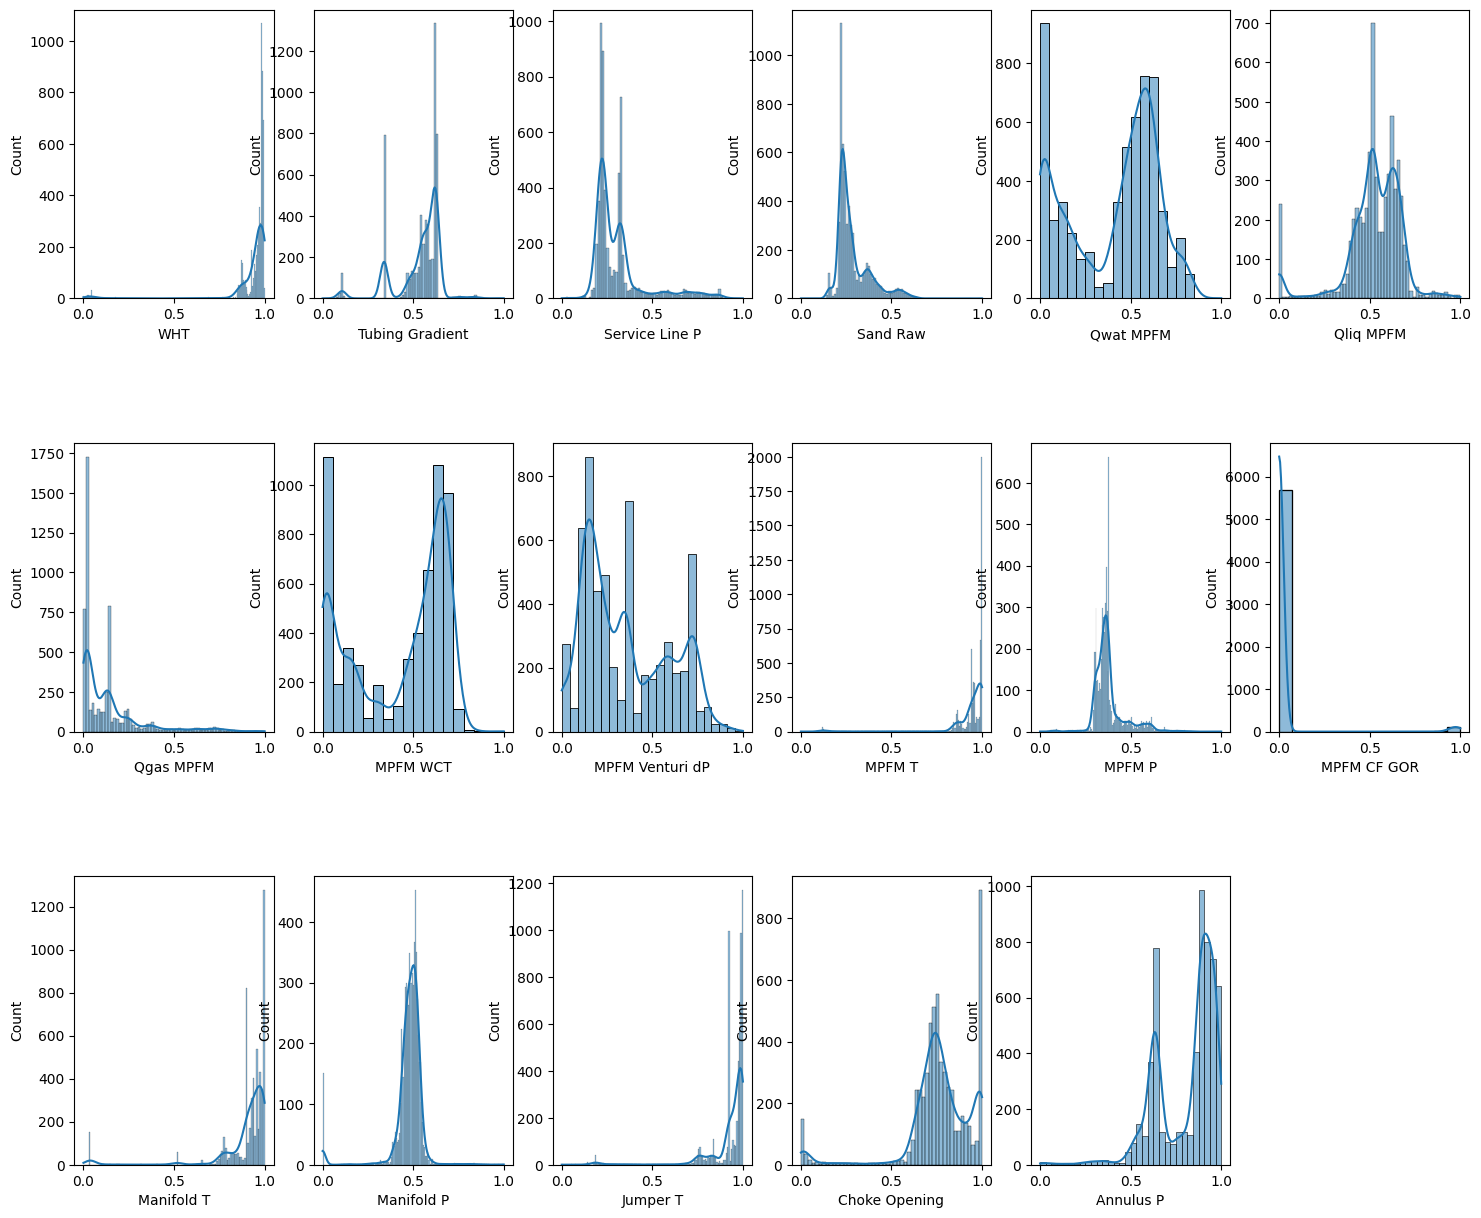

In [169]:
# Create a figure and axis for each histogram
fig, axs = plt.subplots(3, 6, figsize=(18, 15))

axs = axs.ravel()

for i, col in enumerate(df_scaled.columns):
    sns.histplot(df_scaled[col], kde=True, ax=axs[i])

for j in range(len(df_scaled.columns), len(axs)):
    axs[j].axis('off')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [175]:
df_full_scaled = df[['Date', 'Qoil MPFM']].join(df_scaled)

In [176]:
df_full_scaled

,Date,Qoil MPFM,WHT,Tubing Gradient,Service Line P,Sand Raw,Qwat MPFM,Qliq MPFM,Qgas MPFM,MPFM WCT,MPFM Venturi dP,MPFM T,MPFM P,MPFM CF GOR,Manifold T,Manifold P,Jumper T,Choke Opening,Annulus P
0,2007-01-31 23:00:00,15706.773138,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
1,2007-02-01 23:00:00,15706.773138,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
2,2007-02-02 23:00:00,15706.773138,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
3,2007-02-03 23:00:00,15706.773138,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
4,2007-02-04 23:00:00,15706.773138,0.929268,0.339197,0.309091,0.288379,0.402618,0.526082,0.136265,0.006567,0.348693,0.937782,0.379105,0.000000,0.899696,0.475019,0.926060,0.761974,0.810410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,2022-12-26 23:00:00,10925.670806,0.991534,0.631761,0.169222,0.645635,0.835718,0.655687,0.019897,0.726836,0.248021,0.998688,0.299389,0.926013,0.996707,0.397482,0.996893,0.723336,0.859707
5809,2022-12-27 23:00:00,11142.564473,0.991559,0.631805,0.170497,0.591744,0.812666,0.648027,0.019430,0.715237,0.252580,0.998914,0.299025,0.926013,0.996465,0.395833,0.997133,0.718292,0.860040
5810,2022-12-28 23:00:00,11140.120568,0.991653,0.632312,0.169885,0.580355,0.821916,0.652803,0.018795,0.718063,0.255938,0.998831,0.297548,0.926013,0.996090,0.392637,0.997038,0.723409,0.859939
5811,2022-12-29 23:00:00,11400.139595,0.991838,0.632590,0.168379,0.583216,0.816231,0.655072,0.019218,0.710692,0.254084,0.998731,0.296069,0.926013,0.995701,0.390052,0.997250,0.720723,0.860348


### Split data from 2013-2015

In [177]:
start_date = pd.to_datetime('2012-12-31 23:00:00')
end_date = pd.to_datetime('2014-12-31 23:00:00')

df_full_filtered = df_full_scaled[(df_full_scaled['Date']>=start_date) & (df_full_scaled['Date']<=end_date)]
df_full_filtered.head()

,Date,Qoil MPFM,WHT,Tubing Gradient,Service Line P,Sand Raw,Qwat MPFM,Qliq MPFM,Qgas MPFM,MPFM WCT,MPFM Venturi dP,MPFM T,MPFM P,MPFM CF GOR,Manifold T,Manifold P,Jumper T,Choke Opening,Annulus P
2161,2012-12-31 23:00:00,17715.576430,0.955703,0.556323,0.224030,0.261988,0.546795,0.641640,0.273940,0.488003,0.689145,0.948820,0.363386,0.0,0.928048,0.511228,0.941948,0.987566,0.871142
2162,2013-01-01 23:00:00,17825.721443,0.955138,0.553475,0.219261,0.262148,0.547319,0.644131,0.275832,0.486601,0.685809,0.948819,0.366483,0.0,0.927780,0.510115,0.941474,0.985877,0.871211
2163,2013-01-02 23:00:00,17744.036058,0.955093,0.554559,0.220244,0.262978,0.540348,0.638850,0.272841,0.484400,0.671291,0.948680,0.364670,0.0,0.927809,0.509590,0.941481,0.987845,0.870668
2164,2013-01-03 23:00:00,17751.328614,0.955096,0.553873,0.431477,0.268052,0.558004,0.648208,0.266840,0.492903,0.674154,0.948767,0.365069,0.0,0.928009,0.508094,0.941474,0.987499,0.871373
2165,2013-01-04 23:00:00,17838.187431,0.955017,0.552551,0.219552,0.264944,0.540783,0.640972,0.268750,0.483202,0.669149,0.948709,0.366722,0.0,0.927763,0.508512,0.941475,0.987193,0.870901


## Model

### Split scaled dataset

In [205]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_split_scaled, y_split, test_size=0.3)

model = LinearRegression()
model.fit(X_train_split, y_train_split)
model.score(X_test_split, y_test_split)

0.9872227766234644

In [206]:
model = LinearRegression()

cv_results = cross_validate(model, X_split_scaled, y_split, cv=5)

cv_score = cv_results['test_score'].mean()
cv_score

0.9580156623816475

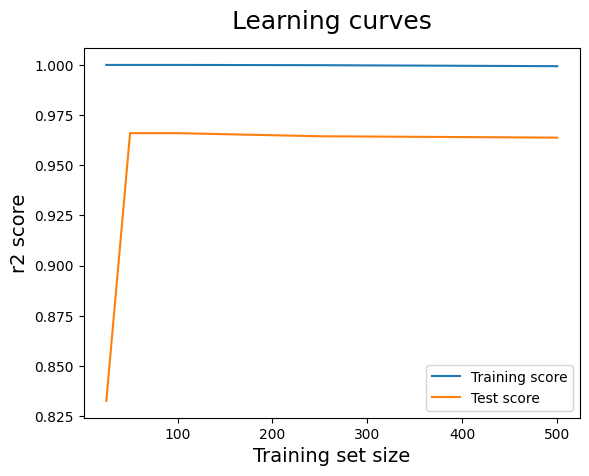

In [207]:
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X_split_scaled, y=y_split, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

### Full scaled dataset -> 2013-2015

In [178]:
X_full = df_full_filtered.drop(columns=['Date', 'Qoil MPFM'])
y_full = df_full_filtered['Qoil MPFM']

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9812151048055596

In [80]:
from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_results = cross_validate(model, X_full, y_full, cv=5)

cv_score = cv_results['test_score'].mean()
cv_score

0.9856724198563048

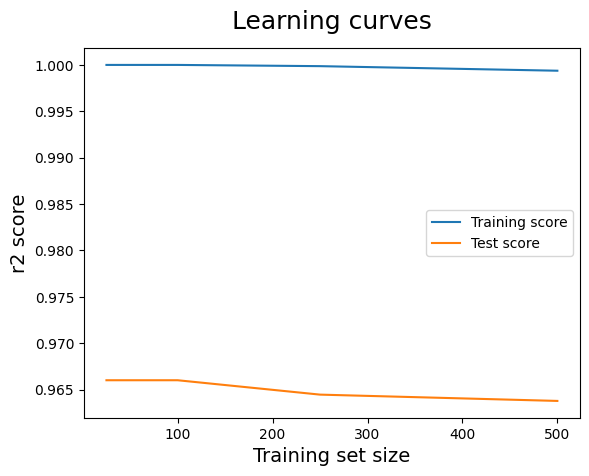

In [185]:
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X_full, y=y_full, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [208]:
from sklearn.inspection import permutation_importance

#instantiate and fit the model 
model = LinearRegression().fit(X_full,y_full)

#performs permutation
permutation_score = permutation_importance(model, X_full, y_full, n_repeats = 10)

#Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_full.columns, permutation_score.importances_mean)).T)
importance_df.columns=['feature', 'score decrease']

#show important features
importance_df.sort_values(by='score decrease', ascending = False)

,feature,score decrease
5,Qliq MPFM,3.882649
4,Qwat MPFM,0.491188
6,Qgas MPFM,0.054394
8,MPFM Venturi dP,0.032891
9,MPFM T,0.030962
7,MPFM WCT,0.029134
15,Choke Opening,0.021804
0,WHT,0.013157
3,Sand Raw,0.005403
16,Annulus P,0.003769


In [220]:
feat_permutation = list(importance_df[importance_df['score decrease']<0.005].feature)
feat_permutation

['Tubing Gradient',
 'Service Line P',
 'MPFM P',
 'MPFM CF GOR',
 'Manifold T',
 'Manifold P',
 'Jumper T',
 'Annulus P']

In [221]:
X_full = X_full.drop(columns=feat_permutation)

In [222]:
model = LinearRegression()

cv_results = cross_validate(model, X_full, y_full, cv=5)

cv_score = cv_results['test_score'].mean()
cv_score

0.9592657185143034

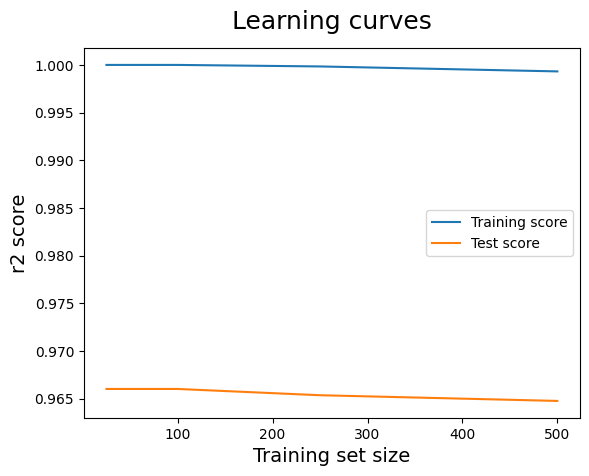

In [224]:
train_sizes = [25,50,75,100,250,500]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X_full, y=y_full, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()